# <div align = 'center'> Lectura 5 Introducción a la Series de Tiempo</div>
### Contenido
  <div align = 'left'>
      <font color = 'steelblue' size = 4>
        5.1 ¿De donde obtener las Series? <br>
        5.2 Extraer la Series <br>
        5.3 Tipos de Series <br>
          </font>
        </div>

In [1]:
# pip install mplcyberpunk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # gráficos

# Se usan para realizar el web scraping
import requests
import time
from io import StringIO

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# Una mejor vizualización de los datos
import mplcyberpunk
plt.style.use("cyberpunk")



In [2]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01205PM/csv/1990-1/2021-12"
content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
content
csv =  StringIO(content)
csv
df = pd.read_csv(csv)
df

,Mes/A&ntilde;o,Tipo de cambio - promedio del periodo (S/ por US$) - Interbancario - Compra
0,Ago.1994,2.228682
1,Sep.1994,2.250500
2,Oct.1994,2.228857
3,Nov.1994,2.185762
4,Dic.1994,2.127857
...,...,...
319,Mar.2021,3.707835
320,Abr.2021,3.697590
321,May.2021,3.770971
322,Jun.2021,3.904743


In [3]:
df.index = pd.date_range(start ='1994-08-01', freq ='M', periods = len(df)) 
df= df.iloc[:,1]
df

1994-08-31    2.228682
1994-09-30    2.250500
1994-10-31    2.228857
1994-11-30    2.185762
1994-12-31    2.127857
                ...   
2021-03-31    3.707835
2021-04-30    3.697590
2021-05-31    3.770971
2021-06-30    3.904743
2021-07-31    3.938600
Freq: M, Name: Tipo de cambio - promedio del periodo (S/ por US$) - Interbancario - Compra, Length: 324, dtype: float64

In [4]:
df.columns= ["TDC"]
df

1994-08-31    2.228682
1994-09-30    2.250500
1994-10-31    2.228857
1994-11-30    2.185762
1994-12-31    2.127857
                ...   
2021-03-31    3.707835
2021-04-30    3.697590
2021-05-31    3.770971
2021-06-30    3.904743
2021-07-31    3.938600
Freq: M, Name: Tipo de cambio - promedio del periodo (S/ por US$) - Interbancario - Compra, Length: 324, dtype: float64

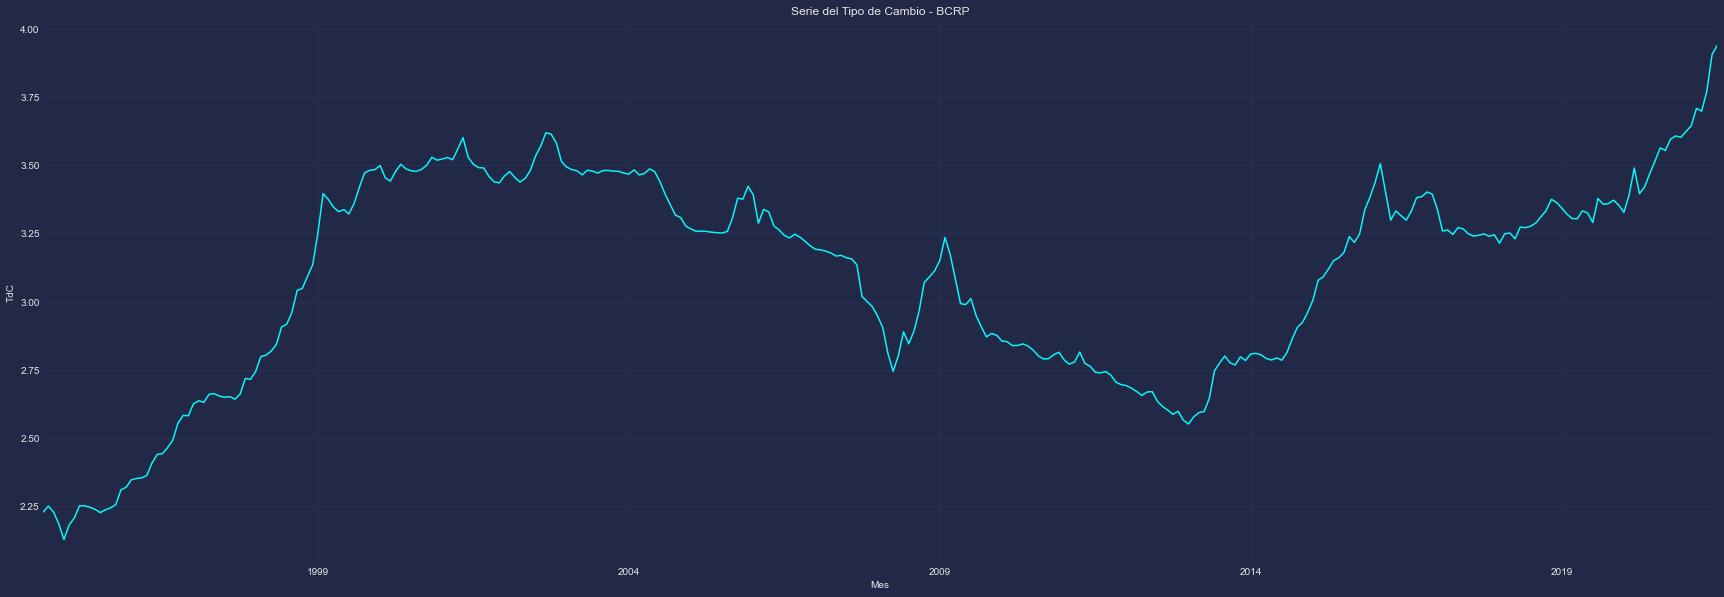

In [5]:
plt.figure(figsize=(30,10))
df.plot()
plt.title("Serie del Tipo de Cambio - BCRP")
plt.xlabel("Mes")
plt.ylabel("TdC")
plt.show()

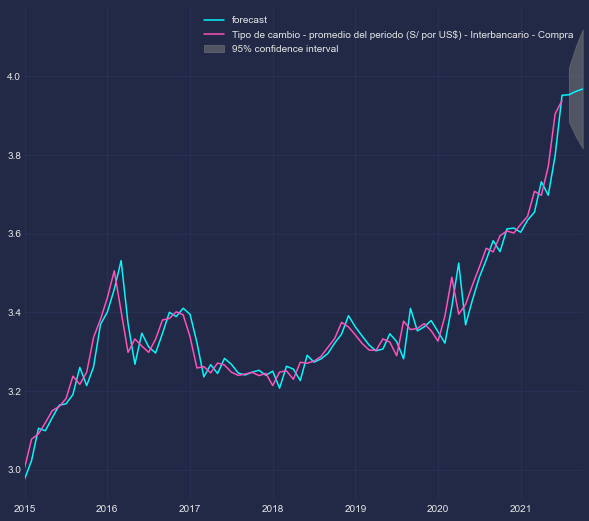

In [41]:
from statsmodels.tsa.arima_model import ARIMA
fig = plt.figure(figsize = (10, 20))
mod = ARIMA(df, order=(1,1,0))
res = mod.fit() 
fig = res.plot_predict(start='2015-01-31', end='2021-10-31',plot_insample=True, dynamic=False,ax = fig.add_subplot(211))
fig.show()

In [42]:
def api_bcrp(codigo,start,end):
    url="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"+codigo+"/"+"csv/"+start+"/"+end
    content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
    csv =  StringIO(content)
    df = pd.read_csv(csv)
    return(df)

In [45]:
data=api_bcrp(codigo="PN01271PM",start="2010-1",end="2021-12")
data

,Mes/A&ntilde;o,&Iacute;ndice de precios Lima Metropolitana (var% mensual) - IPC
0,Ene.2010,0.295916
1,Feb.2010,0.322508
2,Mar.2010,0.280812
3,Abr.2010,0.025357
4,May.2010,0.237860
...,...,...
134,Mar.2021,0.839469
135,Abr.2021,-0.104692
136,May.2021,0.266558
137,Jun.2021,0.519672


In [46]:
data.index = pd.date_range(start ='2010-01-01', freq ='M', periods = len(data)) 
data= data.iloc[:,1]
data

2010-01-31    0.295916
2010-02-28    0.322508
2010-03-31    0.280812
2010-04-30    0.025357
2010-05-31    0.237860
                ...   
2021-03-31    0.839469
2021-04-30   -0.104692
2021-05-31    0.266558
2021-06-30    0.519672
2021-07-31    1.007539
Freq: M, Name: &Iacute;ndice de precios Lima Metropolitana (var% mensual) - IPC, Length: 139, dtype: float64

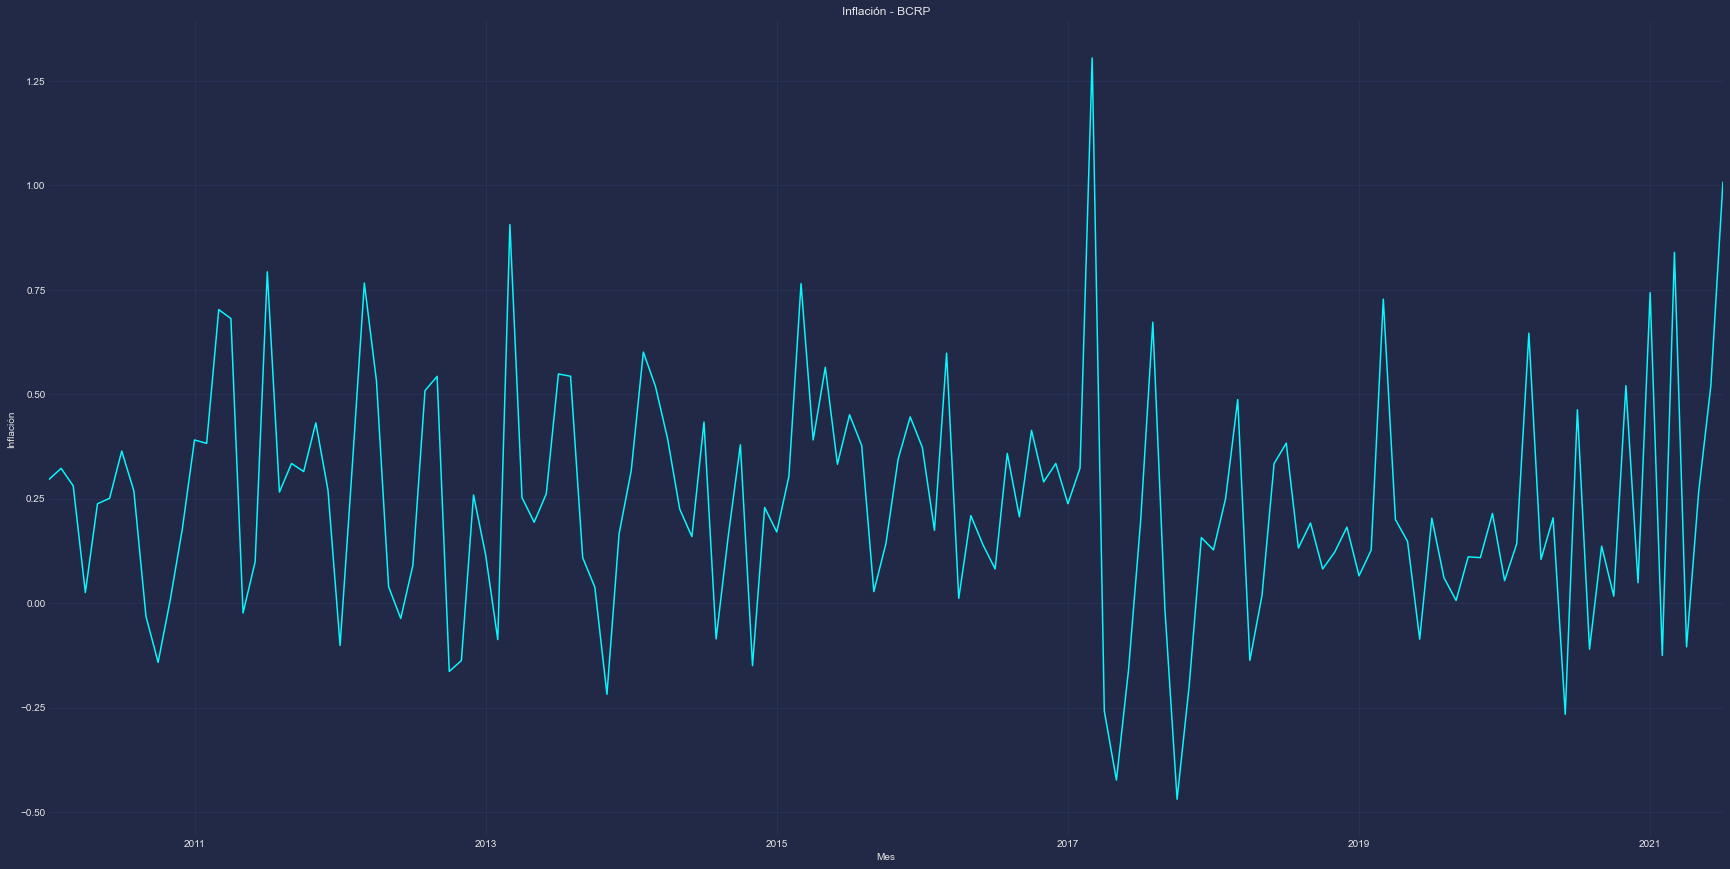

In [51]:
plt.figure(figsize=(30,15))
data.plot()
plt.title("Inflación - BCRP")
plt.xlabel("Mes")
plt.ylabel("Inflación")
plt.show()

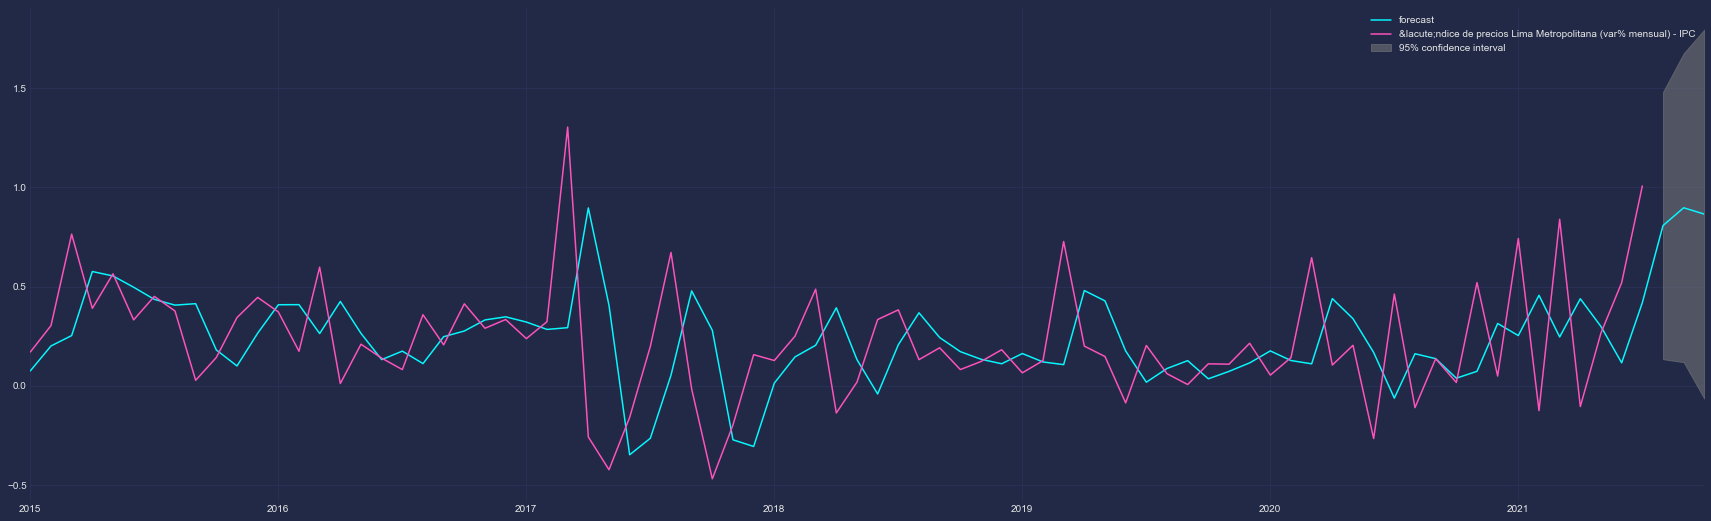

In [54]:
from statsmodels.tsa.arima_model import ARIMA
fig = plt.figure(figsize = (30, 20))
mod = ARIMA(data, order=(1,1,0))
res = mod.fit() 
fig = res.plot_predict(start='2015-01-31', end='2021-10-31',plot_insample=True, dynamic=False,ax = fig.add_subplot(211))

fig.show()

In [58]:
dat=api_bcrp(codigo="PD04694MD",start="1997-1-1",end="2021-12-31")
dat

,D&iacute;a/Mes/A&ntilde;o,Indicadores burs&aacute;tiles - &Iacute;ndice General Burs&aacute;til BVL (var%)
0,02.Ene.97,0.05
1,03.Ene.97,2.24
2,06.Ene.97,0.64
3,07.Ene.97,1.14
4,08.Ene.97,0.66
...,...,...
6277,11.Ago.21,-0.35
6278,12.Ago.21,-1.02
6279,13.Ago.21,-0.34
6280,16.Ago.21,-0.21


In [59]:
dat.index = pd.date_range(start ='1997-01-02', freq ='D', periods = len(dat)) 
dat= dat.iloc[:,1]
dat

1997-01-02    0.05
1997-01-03    2.24
1997-01-04    0.64
1997-01-05    1.14
1997-01-06    0.66
              ... 
2014-03-11   -0.35
2014-03-12   -1.02
2014-03-13   -0.34
2014-03-14   -0.21
2014-03-15   -2.20
Freq: D, Name: Indicadores burs&aacute;tiles - &Iacute;ndice General Burs&aacute;til BVL (var%), Length: 6282, dtype: float64

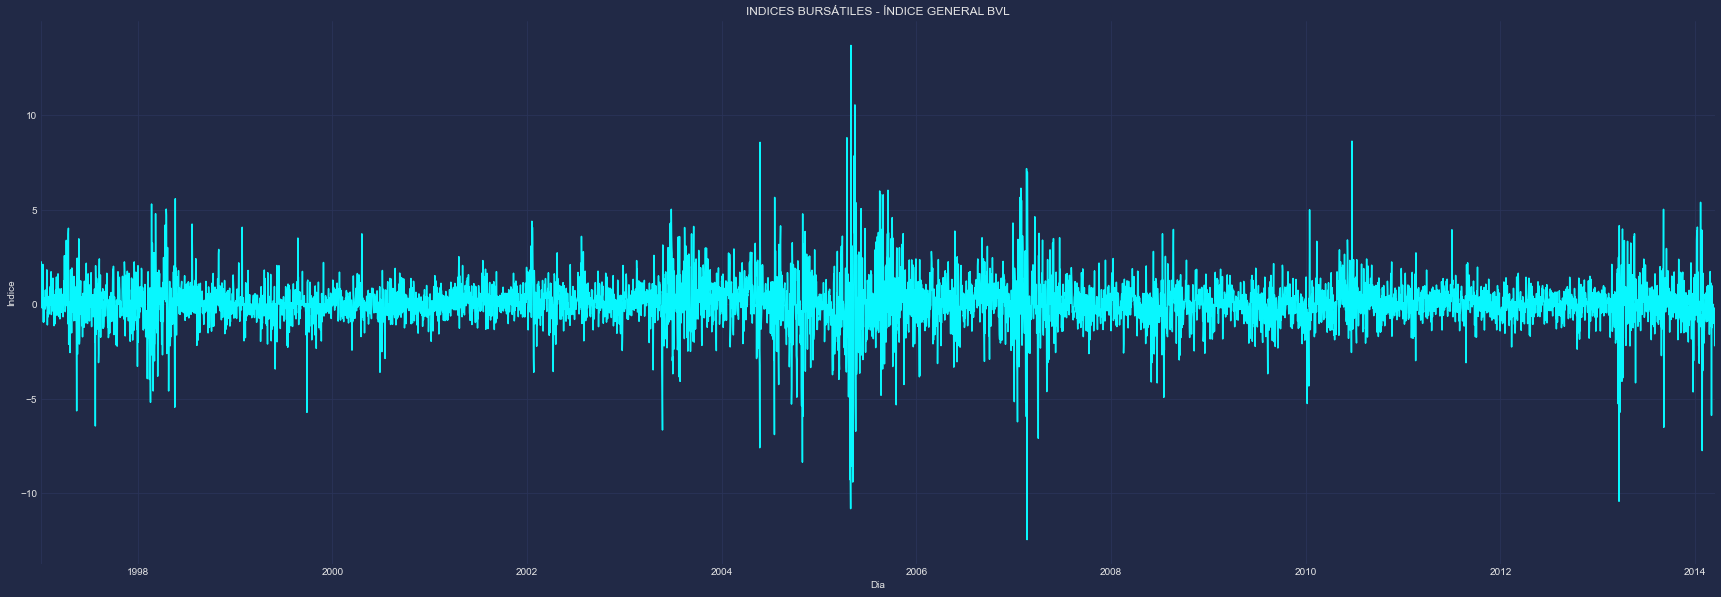

In [61]:
plt.figure(figsize=(30,10))
dat.plot()
plt.title("INDICES BURSÁTILES - ÍNDICE GENERAL BVL")
plt.xlabel("Dia")
plt.ylabel("Indice")
plt.show()

In [62]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN02538AQ/csv/1979-1/2021-12"
content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
csv =  StringIO(content)
df = pd.read_csv(csv)
df


,Trimestre/A&ntilde;o,Producto bruto interno por tipo de gasto (millones S/ 2007) - PBI
0,T1.79,34513.516373
1,T2.79,40882.008514
2,T3.79,40670.622633
3,T4.79,42183.245165
4,T1.80,36357.477805
...,...,...
164,T1.20,123025.581643
165,T2.20,95975.758036
166,T3.20,125523.464088
167,T4.20,141104.740641


In [63]:
df.index = pd.date_range(start ='1979-01-01', freq ='Q', periods = len(df)) 
df= df.iloc[:,1]
df

1979-03-31     34513.516373
1979-06-30     40882.008514
1979-09-30     40670.622633
1979-12-31     42183.245165
1980-03-31     36357.477805
                  ...      
2020-03-31    123025.581643
2020-06-30     95975.758036
2020-09-30    125523.464088
2020-12-31    141104.740641
2021-03-31    127705.524620
Freq: Q-DEC, Name: Producto bruto interno por tipo de gasto (millones S/ 2007) - PBI, Length: 169, dtype: float64

In [64]:
df.columns= ["PBI"]
df

1979-03-31     34513.516373
1979-06-30     40882.008514
1979-09-30     40670.622633
1979-12-31     42183.245165
1980-03-31     36357.477805
                  ...      
2020-03-31    123025.581643
2020-06-30     95975.758036
2020-09-30    125523.464088
2020-12-31    141104.740641
2021-03-31    127705.524620
Freq: Q-DEC, Name: Producto bruto interno por tipo de gasto (millones S/ 2007) - PBI, Length: 169, dtype: float64

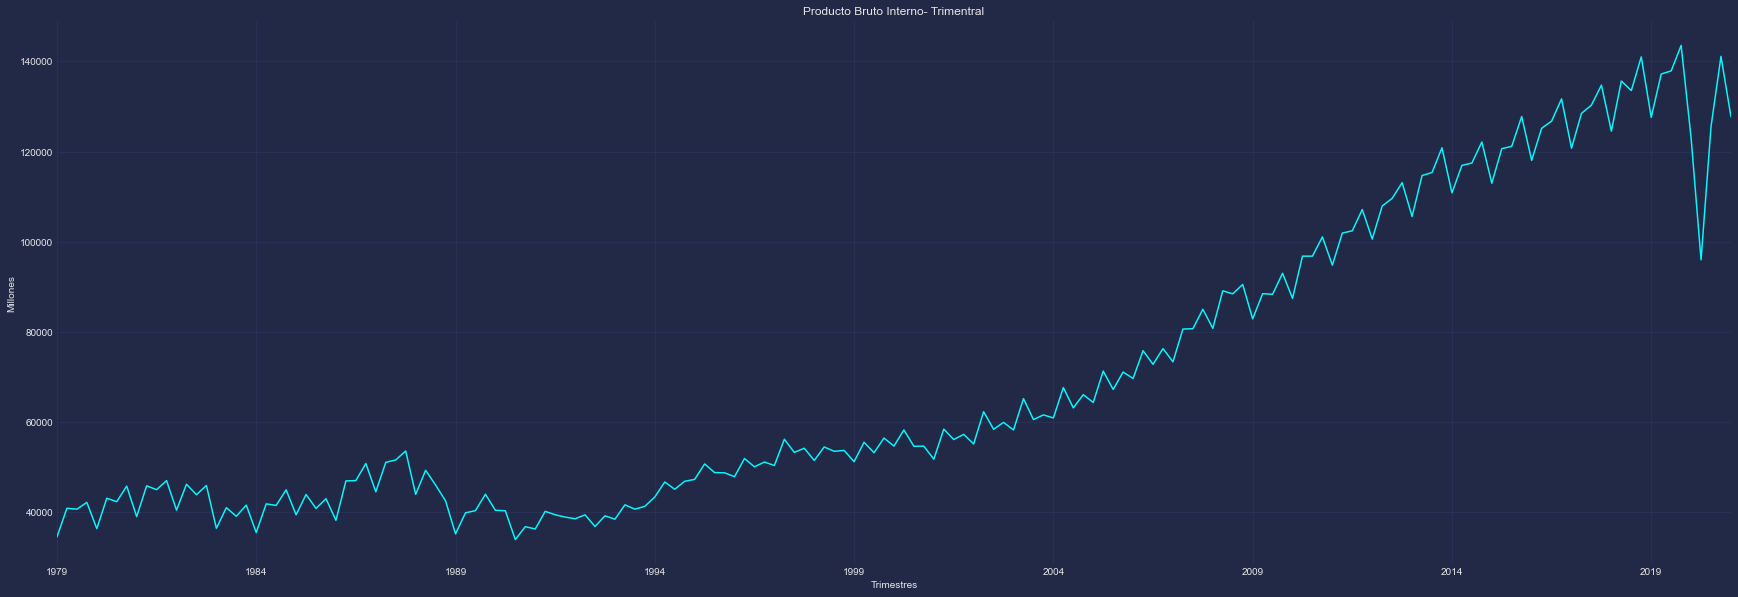

In [65]:
plt.figure(figsize=(30,10))
df.plot()
plt.title("Producto Bruto Interno- Trimentral")
plt.xlabel("Trimestres")
plt.ylabel("Millones")
plt.show()

In [76]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PM04935AA/csv/1922/2020"
content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
csv =  StringIO(content)
df = pd.read_csv(csv)
df

,A&ntilde;o,Producto bruto interno por tipo de gasto (millones S/ 2007) - PBI
0,1922,12774.322213
1,1923,13874.707143
2,1924,14830.080105
3,1925,16228.071296
4,1926,16656.472664
...,...,...
94,2016,501581.000000
95,2017,514215.000000
96,2018,534665.000000
97,2019,546161.000000


In [77]:
df.index = pd.date_range(start ='1922', freq ='Y', periods = len(df)) 
df= df.iloc[:,1]
df

1922-12-31     12774.322213
1923-12-31     13874.707143
1924-12-31     14830.080105
1925-12-31     16228.071296
1926-12-31     16656.472664
                  ...      
2016-12-31    501581.000000
2017-12-31    514215.000000
2018-12-31    534665.000000
2019-12-31    546161.000000
2020-12-31    485629.544407
Freq: A-DEC, Name: Producto bruto interno por tipo de gasto (millones S/ 2007) - PBI, Length: 99, dtype: float64

In [1]:
df.columns= ["PBI Anual"]
df

NameError: name 'df' is not defined

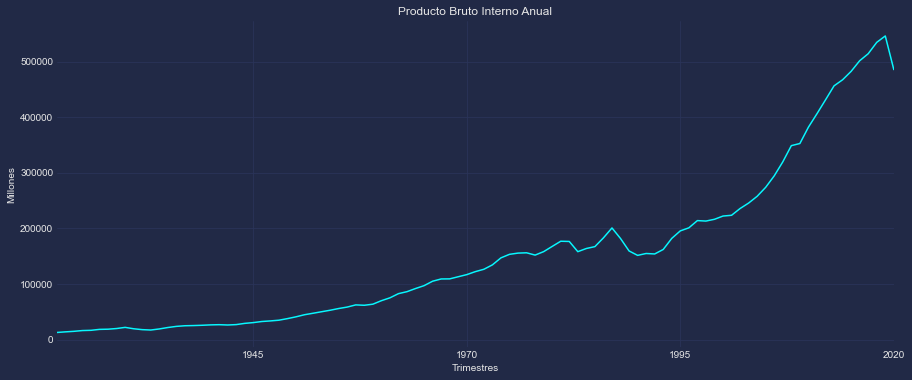

In [81]:
plt.figure(figsize=(15,6))
df.plot()
plt.title("Producto Bruto Interno Anual")
plt.xlabel("Trimestres")
plt.ylabel("Millones")
plt.show()

In [82]:
df= np.log(df)


In [83]:
df

1922-12-31     9.455192
1923-12-31     9.537823
1924-12-31     9.604413
1925-12-31     9.694498
1926-12-31     9.720554
                ...    
2016-12-31    13.125520
2017-12-31    13.150397
2018-12-31    13.189396
2019-12-31    13.210669
2020-12-31    13.093201
Freq: A-DEC, Name: Producto bruto interno por tipo de gasto (millones S/ 2007) - PBI, Length: 99, dtype: float64

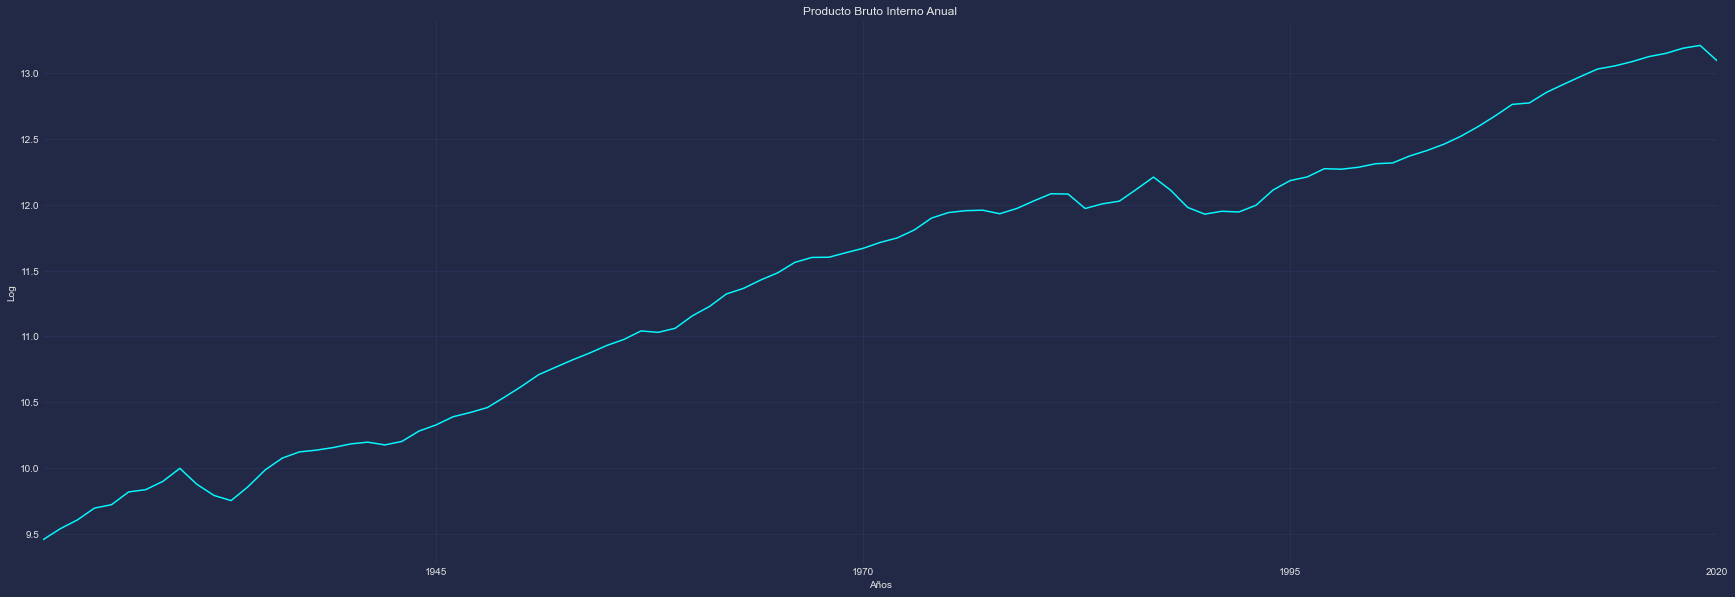

In [84]:
plt.figure(figsize=(30,10))
df.plot()
plt.title("Producto Bruto Interno Anual")
plt.xlabel("Años")
plt.ylabel("Log")
plt.show()

In [50]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01661XM-PN01662XM/csv/2017-1/2021-12"
content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
csv =  StringIO(content)
df = pd.read_csv(csv)
df

,Mes/A&ntilde;o,Cotizaciones de productos (promedio del periodo) - Trigo - EEUU (US$ por toneladas),Cotizaciones de productos (promedio del periodo) - Ma&iacute;z - EEUU (US$ por toneladas)
0,Ene.2017,163.292389,132.706829
1,Feb.2017,170.692906,135.800817
2,Mar.2017,167.679123,132.208891
3,Abr.2017,148.554821,131.863991
4,May.2017,159.323923,133.407055
5,Jun.2017,168.052370,133.977350
6,Jul.2017,190.804839,132.952242
7,Ago.2017,159.164168,125.139720
8,Sep.2017,160.744984,119.923222
9,Oct.2017,166.582621,121.451085


In [ ]:
list(df.columns.values)

In [51]:
df.index = pd.date_range(start ='2017', freq ='M', periods = len(df)) 
df= df.iloc[:,:]
df

,Mes/A&ntilde;o,Cotizaciones de productos (promedio del periodo) - Trigo - EEUU (US$ por toneladas),Cotizaciones de productos (promedio del periodo) - Ma&iacute;z - EEUU (US$ por toneladas)
2017-01-31,Ene.2017,163.292389,132.706829
2017-02-28,Feb.2017,170.692906,135.800817
2017-03-31,Mar.2017,167.679123,132.208891
2017-04-30,Abr.2017,148.554821,131.863991
2017-05-31,May.2017,159.323923,133.407055
2017-06-30,Jun.2017,168.052370,133.977350
2017-07-31,Jul.2017,190.804839,132.952242
2017-08-31,Ago.2017,159.164168,125.139720
2017-09-30,Sep.2017,160.744984,119.923222
2017-10-31,Oct.2017,166.582621,121.451085


In [52]:
df=df.rename({'Mes/A&ntilde;o':'MES','Cotizaciones de productos (promedio del periodo) - Trigo - EEUU (US$ por toneladas)':'TRIGO','Cotizaciones de productos (promedio del periodo) - Ma&iacute;z - EEUU (US$ por toneladas)':'MAIZ'},axis=1)
df

,MES,TRIGO,MAIZ
2017-01-31,Ene.2017,163.292389,132.706829
2017-02-28,Feb.2017,170.692906,135.800817
2017-03-31,Mar.2017,167.679123,132.208891
2017-04-30,Abr.2017,148.554821,131.863991
2017-05-31,May.2017,159.323923,133.407055
2017-06-30,Jun.2017,168.052370,133.977350
2017-07-31,Jul.2017,190.804839,132.952242
2017-08-31,Ago.2017,159.164168,125.139720
2017-09-30,Sep.2017,160.744984,119.923222
2017-10-31,Oct.2017,166.582621,121.451085


<Figure size 3600x360 with 0 Axes>

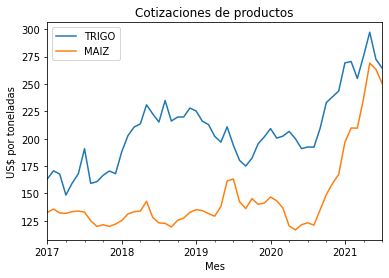

In [57]:
plt.figure(figsize=(50,5))
df.plot()
plt.title("Cotizaciones de productos")
plt.xlabel("Mes")
plt.ylabel("US$ por toneladas")
plt.show()

In [95]:
y = np.zeros(10000)
np.random.seed(0)
epsilon = np.random.standard_normal(10000)
y[0] = 2
for t in range(1,10000):
    y[t] = 1 + 0.5 * y[t-1] + epsilon[t]

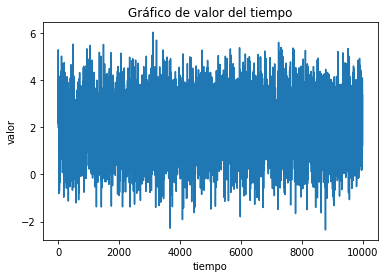

In [103]:
plt.plot(y)
plt.xlabel('tiempo')
plt.ylabel('valor')
plt.title('Gráfico de valor del tiempo');

In [ ]:
#Coeficiente de Autocorrelacion

sm.graphics.tsa.plot_acf(y, lags=20)
plt.xlabel('lags')
plt.ylabel('corr')

Text(0, 0.5, 'corr')

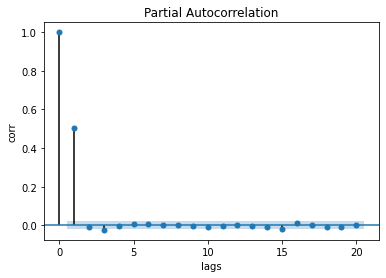

In [100]:
#Coeficiente de Autocorrelación Parcial
sm.graphics.tsa.plot_pacf(y, lags=20)
plt.xlabel('lags')
plt.ylabel('corr')